In [55]:
# 환경조성
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 오류 제거
plt.rc('font', family='Malgun Gothic') 

# 데이터 정제

## 01 한국 관광공사 관광데이터 랩 데이터 불러오기

In [2]:
# 데이터 불러오기
#데이터 업로드
df = pd.read_excel("./data/culdata.xlsx")

## 02활용할 데이터만 정제
문화 향유 시설이란 명목으로 임의로 정의한 공연/행사, 역사관광지, 휴양관광지, 문화시설 카테고리 요소만 사용

### 구군명 생성

In [3]:
#구군명 생성
df_Gu = df
df_Gu["구군명"]= df["도로명주소"].str.split(" ", expand = True)[1]

In [4]:
#활용할 데이터만 정제
df1 = df_Gu[(df_Gu["중분류 카테고리"]== '공연/행사')  |\
    (df_Gu["중분류 카테고리"]== '역사관광지') | \
    (df_Gu["중분류 카테고리"] == '휴양관광지') | \
    (df_Gu["중분류 카테고리"] == '문화시설')].reset_index(drop = True).drop(["순위"], axis =1)

df1

,관광지명,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,구군명
0,해동용궁사,부산 기장군 용궁길 86-0,역사관광지,절,191384,기장군
1,BEXCO,부산 해운대구 APEC로 55-0,문화시설,전시장,122503,해운대구
2,태종대,부산 영도구 전망로 24-0,역사관광지,문화유적지,118816,영도구
3,범어사,부산 금정구 범어사로 250-0,역사관광지,절,81191,금정구
4,부산어린이대공원,부산 부산진구 새싹로 295-0,휴양관광지,테마파크,66601,부산진구
...,...,...,...,...,...,...
1377,시네마테크부산,부산 해운대구 수영강변대로 120-0,공연/행사,극장,3,해운대구
1378,미월드(폐장),부산 수영구 광안해변로 361-0,휴양관광지,놀이시설,3,수영구
1379,청목수목원,부산 부산진구 양성로6번길 53-0,휴양관광지,동식물원,3,부산진구
1380,정해사,부산 영도구 와치로161번길 31-3,역사관광지,절,3,영도구


In [5]:
# 활용할 데이터 정제 2
df2 = df1.drop(["검색건수"], axis = 1)
df2

,관광지명,도로명주소,중분류 카테고리,소분류 카테고리,구군명
0,해동용궁사,부산 기장군 용궁길 86-0,역사관광지,절,기장군
1,BEXCO,부산 해운대구 APEC로 55-0,문화시설,전시장,해운대구
2,태종대,부산 영도구 전망로 24-0,역사관광지,문화유적지,영도구
3,범어사,부산 금정구 범어사로 250-0,역사관광지,절,금정구
4,부산어린이대공원,부산 부산진구 새싹로 295-0,휴양관광지,테마파크,부산진구
...,...,...,...,...,...
1377,시네마테크부산,부산 해운대구 수영강변대로 120-0,공연/행사,극장,해운대구
1378,미월드(폐장),부산 수영구 광안해변로 361-0,휴양관광지,놀이시설,수영구
1379,청목수목원,부산 부산진구 양성로6번길 53-0,휴양관광지,동식물원,부산진구
1380,정해사,부산 영도구 와치로161번길 31-3,역사관광지,절,영도구


## 03구군 별 문화인프라 소계

In [6]:
gu_count = df2.groupby("구군명").count()
gu_count["소계"] = gu_count["소분류 카테고리"]
gu_count = gu_count.drop(["관광지명", "도로명주소", "중분류 카테고리", "소분류 카테고리"], axis = 1)
gu_count

,소계
구군명,
강서구,54
금정구,133
기장군,153
남구,85
동구,80
동래구,98
부산진구,127
북구,65
사상구,56


## 04인구 데이터 소계

In [7]:
ddd=pd.read_csv("./data/ddd.csv")
gu_pop= ddd.sort_values(by = '구군명', ascending = True)
gu_pop

,구군명,인구(명)
11,강서구,137957
10,금정구,232666
15,기장군,174545
6,남구,267731
2,동구,88901
5,동래구,270745
4,부산진구,359886
7,북구,283952
14,사상구,212586
9,사하구,311757


### 문화인프라 데이터·인구 데이터  결합

In [8]:
#두 데이터 합치기(inner join)
df_r =pd.merge(gu_count, gu_pop, how = 'inner', on = '구군명')
df_r

,구군명,소계,인구(명)
0,강서구,54,137957
1,금정구,133,232666
2,기장군,153,174545
3,남구,85,267731
4,동구,80,88901
5,동래구,98,270745
6,부산진구,127,359886
7,북구,65,283952
8,사상구,56,212586
9,사하구,68,311757


### 인구 대비 문화시설 비율 구하기

In [9]:
#비율 구하기
df_r["인구 대비 문화시설비"] = df_r["소계"]/df_r["인구(명)"]

In [10]:
# 천명 단위로 
df_r2 = df_r.rename(columns={'인구(명)':'인구(천명)'})
df_r2["인구(천명)"] = df_r2["인구(천명)"]/1000
df_r2

,구군명,소계,인구(천명),인구 대비 문화시설비
0,강서구,54,137.957,0.000391
1,금정구,133,232.666,0.000572
2,기장군,153,174.545,0.000877
3,남구,85,267.731,0.000317
4,동구,80,88.901,0.000900
5,동래구,98,270.745,0.000362
6,부산진구,127,359.886,0.000353
7,북구,65,283.952,0.000229
8,사상구,56,212.586,0.000263
9,사하구,68,311.757,0.000218


In [11]:
    df_r2["인구 대비 문화시설비"] = df_r2["소계"]/df_r2["인구(천명)"]
df_r2

,구군명,소계,인구(천명),인구 대비 문화시설비
0,강서구,54,137.957,0.391426
1,금정구,133,232.666,0.571635
2,기장군,153,174.545,0.876565
3,남구,85,267.731,0.317483
4,동구,80,88.901,0.899877
5,동래구,98,270.745,0.361964
6,부산진구,127,359.886,0.352890
7,북구,65,283.952,0.228912
8,사상구,56,212.586,0.263423
9,사하구,68,311.757,0.218119


In [12]:
#각각의 값 추가
#각 구군별 집계(sum)
#인구대비문화시설비: 평균값

newdata = {'구군명' : '부산시전체', '소계' : 1382, '인구(천명)' : 3391.946 , '인구 대비 문화시설비' : 0.4991641684834858 }
df_r3 = df_r2.append(newdata, ignore_index = True)
df_r3

,구군명,소계,인구(천명),인구 대비 문화시설비
0,강서구,54,137.957,0.391426
1,금정구,133,232.666,0.571635
2,기장군,153,174.545,0.876565
3,남구,85,267.731,0.317483
4,동구,80,88.901,0.899877
5,동래구,98,270.745,0.361964
6,부산진구,127,359.886,0.352890
7,북구,65,283.952,0.228912
8,사상구,56,212.586,0.263423
9,사하구,68,311.757,0.218119


### 그래프로 시각화하기

Text(0.5, 1.0, '구군별 인구대비문화시설비율')

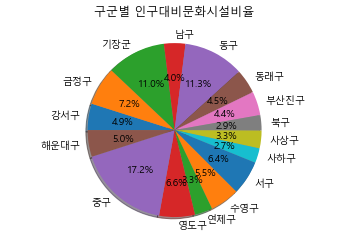

In [13]:
# 구군별 인구대비 문화시설비
data = df_r2
plt.axis('equal')
plt.pie(data["인구 대비 문화시설비"], \
       labels =data["구군명"], startangle =180, autopct = '%1.1f%%'\
        , shadow= True, counterclock= False )
plt.title("구군별 인구대비문화시설비율")
#plt.savefig("구군별 인구대비문화시설비율.png")

Text(0.5, 1.0, '구군별 문화시설수')

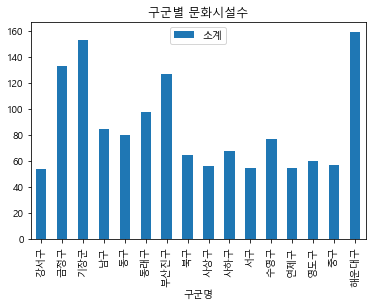

In [14]:
#구군별 정량적인 문화시설 수
df_r.plot.bar(x='구군명', y='소계', rot=90)
plt.title("구군별 문화시설수")
#plt.savefig("구군별 문화시설수.png")

---

## 05구군별 문화 소비

In [15]:
df_moon = pd.DataFrame({'구군명' :['강서구'
                        , '금정구'
                        , '기장군'
                        , '남구'
                        , '동구'
                        , '동래구'
                        , '부산진구'
                        , '북구'
                        , '사상구'
                        , '사하구'
                        , '서구'
                        , '수영구'
                        , '연제구'
                        , '영도구'
                        , '중구'
                        , '해운대구'
                        ],
                       '총액/6개월,만원' : \
                        [5280, 4026, 4676, 9017, 204, 5625, 6102, 9214, 2460, 4840
                        , 367, 2771, 3527, 302, 104, 12603]})
df_moon

#출처: 한국 문화정보원 - 지역문화생활SOC 분석 2020

,구군명,"총액/6개월,만원"
0,강서구,5280
1,금정구,4026
2,기장군,4676
3,남구,9017
4,동구,204
5,동래구,5625
6,부산진구,6102
7,북구,9214
8,사상구,2460
9,사하구,4840


Text(0.5, 1.0, '구군별 총액/6개월, 만원')

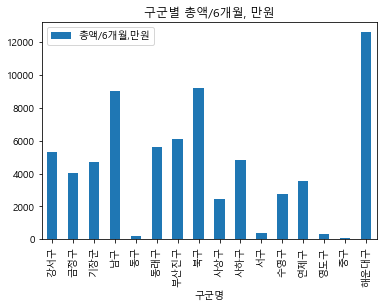

In [16]:
df_moon.plot.bar(x='구군명', y='총액/6개월,만원', rot=90)
plt.title("구군별 총액/6개월, 만원")
#plt.savefig("구군별 문화소비 총액.png")

In [17]:
df_moon2 = pd.DataFrame({'구군명' :['강서구'
                        , '금정구'
                        , '기장군'
                        , '남구'
                        , '동구'
                        , '동래구'
                        , '부산진구'
                        , '북구'
                        , '사상구'
                        , '사하구'
                        , '서구'
                        , '수영구'
                        , '연제구'
                        , '영도구'
                        , '중구'
                        , '해운대구'
                        ],
                       '인당 평균, 원' : \
                        [24637, 19448, 19260, 25541, 15864, 23629, 22111, 20654, 21482, 25639
                        , 21914, 28732, 29358, 22452, 12306,  28372]})
df_moon2

#출처: 한국 문화정보원 - 지역문화생활SOC 분석 2020

,구군명,"인당 평균, 원"
0,강서구,24637
1,금정구,19448
2,기장군,19260
3,남구,25541
4,동구,15864
5,동래구,23629
6,부산진구,22111
7,북구,20654
8,사상구,21482
9,사하구,25639


Text(0.5, 1.0, '구군별 문화소비(인당 평균, 원)')

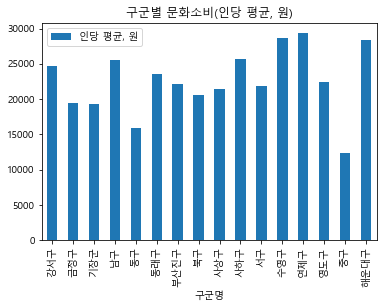

In [61]:
df_moon2.plot.bar(x='구군명', y='인당 평균, 원', rot=90)
plt.title("구군별 문화소비(인당 평균, 원)")
#plt.savefig("구군별 문화소비 인당 평균.png")

In [72]:
# 30대 총 소득 분석
df_moon3 = pd.DataFrame({'구군명' :['강서구'
                        , '금정구'
                        , '기장군'
                        , '남구'
                        , '동구'
                        , '동래구'
                        , '부산진구'
                        , '북구'
                        , '사상구'
                        , '사하구'
                        , '서구'
                        , '수영구'
                        , '연제구'
                        , '영도구'
                        , '중구'
                        , '해운대구'
                        ],
                       '30대 총소득' : \
                        [4807882, 5857409, 5501726, 5463625, 5313823, 5752712, 5482245, 5499402, 4810029, 5121122
                        , 5420228, 5779199, 5726804, 5255152, 5092043,6032635]})
df_moon3

,구군명,30대 총소득
0,강서구,4807882
1,금정구,5857409
2,기장군,5501726
3,남구,5463625
4,동구,5313823
5,동래구,5752712
6,부산진구,5482245
7,북구,5499402
8,사상구,4810029
9,사하구,5121122


In [74]:
df_moon33 = df_moon3.sort_values(by = '30대 총소득', ascending = False)

Text(0, 0.5, '구군명')

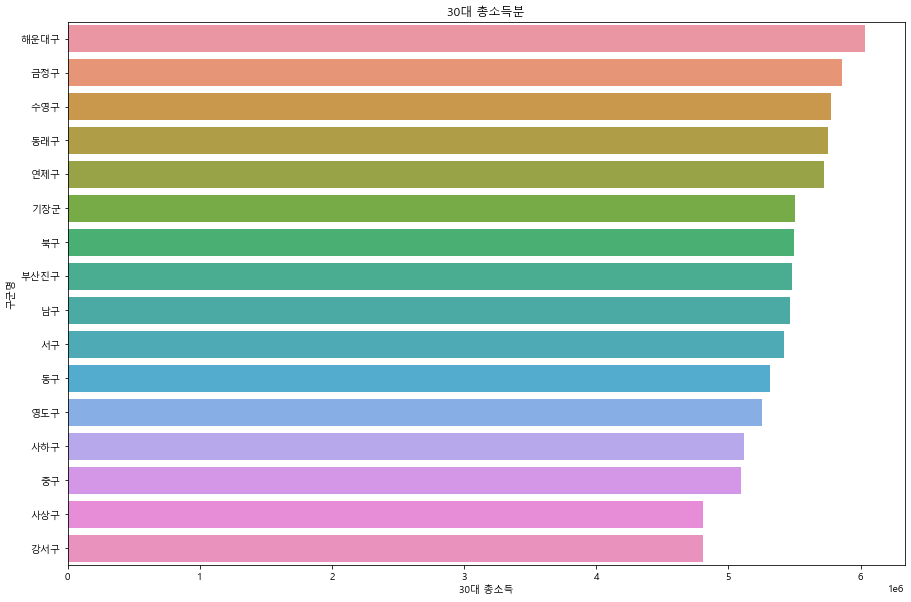

In [75]:

    # 그래프 사이즈 설정
    fig = plt.figure(figsize = (15, 10))

    # x축 y축에 넣을 컬럼 설정 / 기반 데이터 설정
    sns.barplot(y = '구군명', x = '30대 총소득', data = df_moon33, orient = 'h')

    # 그래프 제목 설정
    plt.title('30대 총소득분')

    # x, y축 이름 설정
    plt.xlabel('30대 총소득')
    plt.ylabel('구군명')

    # 출력
    #plt.show()
    #plt.savefig('./counts1.png')

---

## 06구군별 부동산 시세

In [19]:
gum = pd.read_csv("./save/gum.csv").drop(["Unnamed: 0"], axis = 1)
gum

df_Bamp = pd.DataFrame({'구군명' :['강서구'
                        , '금정구'
                        , '기장군'
                        , '남구'
                        , '동구'
                        , '동래구'
                        , '부산진구'
                        , '북구'
                        , '사상구'
                        , '사하구'
                        , '서구'
                        , '수영구'
                        , '연제구'
                        , '영도구'
                        , '중구'
                        , '해운대구'
                        ],
                       '100m' : \
                        [5.5, 5.0, 4.0, 6.0, 4.8, 5.9, 3.7, 3.7, 2.3, 2.6
                        , 4.2, 8.4, 5.7, 2.3, 1.8, 6.8]})
df_Bamp

#출처KB 부동산 아파트 시세

,구군명,100m
0,강서구,5.5
1,금정구,5.0
2,기장군,4.0
3,남구,6.0
4,동구,4.8
5,동래구,5.9
6,부산진구,3.7
7,북구,3.7
8,사상구,2.3
9,사하구,2.6


Text(0.5, 1.0, '지역별 부동산 가격')

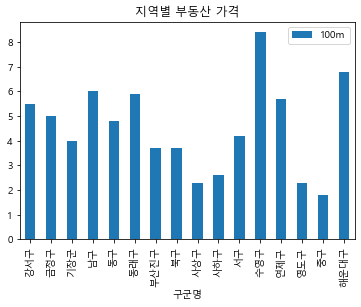

In [20]:
#지역별 부동산 가격(억원)
df_Bamp.plot.bar(x='구군명', y='100m', rot=90)
plt.title("지역별 부동산 가격")
#plt.savefig("지역별 부동산 가격.png")

---

## 07시군구 경제활동 인구 총괄

In [21]:
df_w = pd.read_csv("./data/시군구_경제활동인구_총괄_20220318161407.csv").sort_values(by ='행정구역별', ascending = True)
df_w

,행정구역별,2021.2/2,2021.2/2.1,2021.2/2.2,2021.2/2.3,2021.2/2.4,2021.2/2.5,2021.2/2.6,2021.2/2.7,2021.2/2.8
12,부산 강서구,113.0,74.8,71.9,3.0,38.1,66.3,63.6,68.2,4.0
11,부산 금정구,212.2,114.0,109.7,4.4,98.2,53.7,51.7,60.2,3.8
16,부산 기장군,144.4,86.6,83.1,3.5,57.8,60.0,57.6,64.8,4.0
7,부산 남구,237.0,124.3,118.5,5.8,112.7,52.4,50.0,58.1,4.7
3,부산 동구,79.4,41.9,40.0,1.9,37.6,52.7,50.4,60.8,4.4
6,부산 동래구,226.6,128.4,121.9,6.5,98.2,56.7,53.8,63.1,5.1
5,부산 부산진구,317.8,179.0,171.6,7.5,138.8,56.3,54.0,63.0,4.2
8,부산 북구,245.5,133.4,128.1,5.3,112.1,54.3,52.2,60.7,4.0
15,부산 사상구,191.3,111.0,105.6,5.4,80.3,58.0,55.2,63.1,4.9
10,부산 사하구,273.2,155.0,147.9,7.0,118.2,56.7,54.2,62.7,4.5


### 정제하기

In [22]:
# 정제하기

df_w2 = df_w[['행정구역별', '2021.2/2.1', '2021.2/2.5']]
df_w2
df_w2.rename(columns = {'행정구역별':'행정구역별','2021.2/2.1':'경제활동인구 (천명)', '2021.2/2.5':'경제활동참가율 (％)'},inplace=True)

C:\Users\ad\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [23]:
df_w2 = df_w2.reset_index(drop = True)
df_w2 = df_w2.drop(16)

In [24]:
df_w2

,행정구역별,경제활동인구 (천명),경제활동참가율 (％)
0,부산 강서구,74.8,66.3
1,부산 금정구,114.0,53.7
2,부산 기장군,86.6,60.0
3,부산 남구,124.3,52.4
4,부산 동구,41.9,52.7
5,부산 동래구,128.4,56.7
6,부산 부산진구,179.0,56.3
7,부산 북구,133.4,54.3
8,부산 사상구,111.0,58.0
9,부산 사하구,155.0,56.7


### 행정구역별을 구군명으로, 행안의 '부산 제거'

In [25]:
df_w2["행정구역별"] = df_w2["행정구역별"].str.replace(pat = "부산", repl=r"" , regex = True)
df_w2.rename(columns = {'행정구역별' : '구군명'}, inplace  = True)

In [26]:
df_w2.replace(' 진구', '부산진구').replace(" ", "")

,구군명,경제활동인구 (천명),경제활동참가율 (％)
0,강서구,74.8,66.3
1,금정구,114.0,53.7
2,기장군,86.6,60.0
3,남구,124.3,52.4
4,동구,41.9,52.7
5,동래구,128.4,56.7
6,부산진구,179.0,56.3
7,북구,133.4,54.3
8,사상구,111.0,58.0
9,사하구,155.0,56.7


### 데이터 타입 변경

In [27]:
#object -> floas
df_w2.dtypes

구군명            object
경제활동인구 (천명)    object
경제활동참가율 (％)    object
dtype: object

In [59]:
df_w2 = df_w2.astype({'경제활동인구 (천명)' : float , '경제활동참가율 (％)' :float }) 

In [29]:
#전체 합
print(df_w2["경제활동인구 (천명)"].mean())
print(df_w2["경제활동참가율 (％)"].mean())

103.00625000000002
55.956250000000004


### 시각화

Text(0.5, 1.0, '구군별 경제활동 참가율')

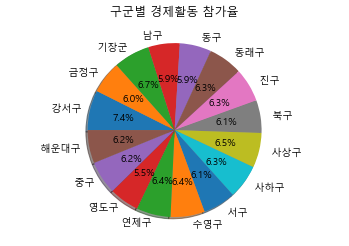

In [30]:
data = df_w2
plt.axis('equal')
plt.pie(data["경제활동참가율 (％)"], \
       labels =data["구군명"], startangle =180, autopct = '%1.1f%%'\
        , shadow= True, counterclock= False )
plt.title("구군별 경제활동 참가율")
#plt.savefig("구군별 결제활동 참가율.png")

---

## 08구군별 면적

In [31]:
df_map1 = pd.read_csv("./data/busan_total.csv").sort_values(by = '구군별' , ascending = True)
df_map1

,구군별,면적
1,강서구,181495480.3
12,금정구,65262005.8
16,기장군,218295907.8
8,남구,26819283.1
4,동구,9864621.0
7,동래구,16631310.8
2,부산,770074758.6
6,부산진구,29667536.8
9,북구,39369728.2
15,사상구,36101153.0


In [32]:
#부산 제거
df_map1= df_map1.drop(2)

In [33]:
df_map1.reset_index(drop = True)

,구군별,면적
0,강서구,181495480.3
1,금정구,65262005.8
2,기장군,218295907.8
3,남구,26819283.1
4,동구,9864621.0
5,동래구,16631310.8
6,부산진구,29667536.8
7,북구,39369728.2
8,사상구,36101153.0
9,사하구,41770877.4


In [34]:
#### 면적 비율( 면적/면적 총합 * 100)
df_map1["비율"] = (df_map1["면적"]/770074758.6000001)* 100

In [35]:
df_map1

,구군별,면적,비율
1,강서구,181495480.3,23.568553
12,금정구,65262005.8,8.474762
16,기장군,218295907.8,28.347366
8,남구,26819283.1,3.482686
4,동구,9864621.0,1.280995
7,동래구,16631310.8,2.159701
6,부산진구,29667536.8,3.852553
9,북구,39369728.2,5.112455
15,사상구,36101153.0,4.688006
11,사하구,41770877.4,5.424263


### 면적비율

In [36]:
## 데이터 준비
#colors = ['red','yellow','purple','burlywood','lightcoral'] ## 색상
labels = df_map1["구군별"] ## 라벨
frequency = df_map1["비율"] ## 빈도
 
## 데이터 라벨, 빈도수, 색상을 빈도수를 기준으로 정렬해야한다.
labels_frequency = zip(labels,frequency,colors) 
labels_frequency = sorted(labels_frequency,key=lambda x: x[1],reverse=True)
 
sorted_labels = [x[0] for x in labels_frequency] ## 정렬된 라벨
sorted_frequency = [x[1] for x in labels_frequency] ## 정렬된 빈도수
sorted_colors = [x[2] for x in labels_frequency] ## 정렬된 색상
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(sorted_frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계방향으로 그려짐
       colors = sorted_colors, ## 색상 지정      
       )
 
total = np.sum(frequency) ## 빈도수 합
 
threshold = 5
sum_pct = 0 ## 퍼센티지
count_less_5pct = 3 ## 5%보다 작은 라벨의 개수
spacing = 0.1
for i,l in enumerate(sorted_labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 파이의 중심 좌표
    
    ## 비율 상한선보다 작은 것들은 계단형태로 만든다.
    if sorted_frequency[i]/total*100 < threshold:
        x = (r/2+spacing*count_less_5pct)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2+spacing*count_less_5pct)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        count_less_5pct += 1
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
    
    ## 퍼센티지 출력
    if i < len(labels) - 1:
        sum_pct += float(f'{sorted_frequency[i]/total*100:.2f}')
        ax.text(x,y,f'{sorted_frequency[i]/total*100:.2f}%',ha='center',va='center',fontsize=12)
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center',fontsize=12)
 
plt.legend(pie[0],sorted_labels) ## 범례
plt.title("구군별 면적비율")
plt.show()
plt.savefig("구군별 면적비율.png")
#출처 : https://zephyrus1111.tistory.com/36

NameError: name 'colors' is not defined

--- 

# 상관관계 분석

In [76]:
#상관관계분석

df_corr = pd.DataFrame({"문화인프라수":df_r["소계"], "부동산":df_Bamp['100m'], \
                        '지역별 총 문화소비' :df_moon["총액/6개월,만원"], \
                        '지역별 인당 문화소비' : df_moon2["인당 평균, 원"], \
                        '경제활동인구' : df_w2['경제활동인구 (천명)'],'경제활동참가율' : df_w2['경제활동참가율 (％)'], \
                        '면적' : df_map1["면적"], '인구(천명)' : df_r2["인구(천명)"], '30대 총소득' : df_moon3["30대 총소득"] })

#두집단간 상관관계
corr = df_corr.corr(method = 'pearson')
corr

,문화인프라수,부동산,지역별 총 문화소비,지역별 인당 문화소비,경제활동인구,경제활동참가율,면적,인구(천명),30대 총소득
문화인프라수,1.000000,0.296142,0.518814,0.036699,0.525280,-0.013474,0.402504,0.540533,0.616675
부동산,0.296142,1.000000,0.401956,0.622646,0.238286,0.158464,0.153945,0.262211,0.646618
지역별 총 문화소비,0.518814,0.401956,1.000000,0.473703,0.816965,0.121270,-0.033120,0.841173,0.425653
지역별 인당 문화소비,0.036699,0.622646,0.473703,1.000000,0.534001,0.178506,0.039649,0.538672,0.370013
경제활동인구,0.525280,0.238286,0.816965,0.534001,1.000000,0.062673,0.149401,0.995661,0.403969
경제활동참가율,-0.013474,0.158464,0.121270,0.178506,0.062673,1.000000,-0.147776,-0.000920,-0.341735
면적,0.402504,0.153945,-0.033120,0.039649,0.149401,-0.147776,1.000000,0.141598,0.464424
인구(천명),0.540533,0.262211,0.841173,0.538672,0.995661,-0.000920,0.141598,1.000000,0.456864
30대 총소득,0.616675,0.646618,0.425653,0.370013,0.403969,-0.341735,0.464424,0.456864,1.000000


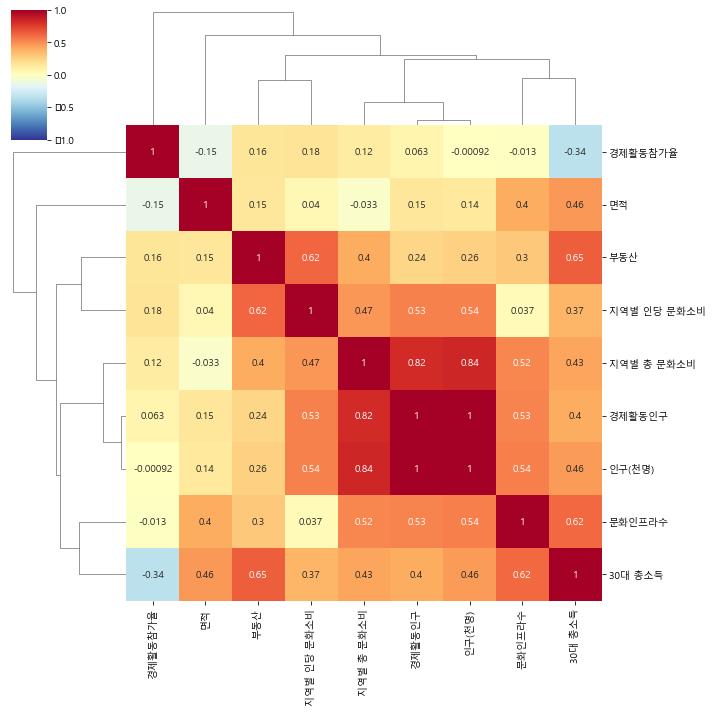

In [78]:
sns.clustermap(corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )
#plt.savefig("상관관계.png")

## 중분류 카테고리가 끼치는 영향 분석

In [39]:
df_j = pd.read_csv("./save/중분류카테고리분류.csv").drop(['Unnamed: 0'], axis = 1)

In [40]:
df_j

,중분류 카테고리,구군명,counts
0,공연/행사,강서구,4
1,휴양관광지,강서구,1
2,문화시설,강서구,21
3,역사관광지,강서구,28
4,휴양관광지,금정구,3
...,...,...,...
59,공연/행사,중구,12
60,문화시설,해운대구,74
61,역사관광지,해운대구,58
62,공연/행사,해운대구,11


In [41]:
df_go.info()

NameError: name 'df_go' is not defined

In [42]:
df_go = df_j[df_j["중분류 카테고리"] == '공연/행사']
df_hue = df_j[df_j["중분류 카테고리"] == '휴양관광지']
df_yuc = df_j[df_j["중분류 카테고리"] == '역사관광지']
df_moo = df_j[df_j["중분류 카테고리"] == '문화시설']

df_go =df_go.astype({'counts': float})
df_hue = df_hue.astype({'counts': float})
df_yuc = df_yuc.astype({'counts': float})
df_moo =df_moo.astype({'counts': float})


In [43]:
df_moo

,중분류 카테고리,구군명,counts
2,문화시설,강서구,21.0
7,문화시설,금정구,43.0
11,문화시설,기장군,31.0
12,문화시설,남구,31.0
18,문화시설,동구,25.0
20,문화시설,동래구,22.0
24,문화시설,부산진구,41.0
28,문화시설,북구,18.0
34,문화시설,사상구,14.0
36,문화시설,사하구,30.0


In [44]:
sns.clustermap(corr2, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )
#plt.savefig("상관관계.png")

NameError: name 'corr2' is not defined

In [45]:
df_corr2 = pd.DataFrame({"문화시설수":df_r["소계"], "부동산":df_Bamp['100m'], \
                        '지역별 총 문화소비' :df_moon["총액/6개월,만원"], \
                        '지역별 인당 문화소비' : df_moon2["인당 평균, 원"], \
                        '경제활동인구' : df_w2['경제활동인구 (천명)'], \
                        '경제활동참가율' : df_w2['경제활동참가율 (％)'], \
                        '면적' : df_map1["면적"],\
                        '공연/행사' : df_go["counts"],\
                        '휴양관광지' : df_hue["counts"] \
                        , '역사관광지' : df_yuc["counts"] \
                        ,'문화시설' : df_moo["counts"]})

#두집단간 상관관계
corr2 = df_corr2.corr(method = 'pearson')
corr2

,문화시설수,부동산,지역별 총 문화소비,지역별 인당 문화소비,경제활동인구,경제활동참가율,면적,공연/행사,휴양관광지,역사관광지,문화시설
문화시설수,1.000000,0.296142,0.518814,0.036699,0.525280,-0.013474,0.402504,0.387387,-0.457918,-0.454534,-0.768433
부동산,0.296142,1.000000,0.401956,0.622646,0.238286,0.158464,0.153945,-0.619563,-0.496520,-0.964806,-0.111721
지역별 총 문화소비,0.518814,0.401956,1.000000,0.473703,0.816965,0.121270,-0.033120,-0.445756,0.574705,-0.891247,0.689260
지역별 인당 문화소비,0.036699,0.622646,0.473703,1.000000,0.534001,0.178506,0.039649,-0.559543,0.778099,-0.880174,0.043781
경제활동인구,0.525280,0.238286,0.816965,0.534001,1.000000,0.062673,0.149401,0.023497,0.672638,-0.252451,0.901132
경제활동참가율,-0.013474,0.158464,0.121270,0.178506,0.062673,1.000000,-0.147776,-0.897351,0.812190,0.922602,-0.993382
면적,0.402504,0.153945,-0.033120,0.039649,0.149401,-0.147776,1.000000,0.011296,-0.369233,0.264265,-0.875643
공연/행사,0.387387,-0.619563,-0.445756,-0.559543,0.023497,-0.897351,0.011296,1.000000,NaN,NaN,NaN
휴양관광지,-0.457918,-0.496520,0.574705,0.778099,0.672638,0.812190,-0.369233,NaN,1.000000,NaN,NaN
역사관광지,-0.454534,-0.964806,-0.891247,-0.880174,-0.252451,0.922602,0.264265,NaN,NaN,1.000000,NaN


In [47]:
sns.clustermap(corr3, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )
#plt.savefig("문화시설 상관관계.png")

NameError: name 'corr3' is not defined

---

## 회기분석 정제

In [53]:
df_he = gu_pop
df_he["총소비"] = df_moon["총액/6개월,만원"]*10000
df_he["평균소비"] = df_moon2["인당 평균, 원"]

df_he["총소비2"] = df_he["인구(명)"] * df_he["평균소비"] 


TypeError: 'method' object is not subscriptable

In [58]:
df_he.to_csv("./save/회기.csv")